# Feature selection by category or reference paper
This tests all feature sets by classifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

from sklearn.preprocessing import MinMaxScaler  

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

In [5]:
correlations = data[data.columns[1:]].corr()['Severity'][:-1]  # Correlation of every column compared to Severity

In [6]:
correlations.sort_values(ascending=False)

Cervical_perimeter                 0.328530
Abdominal_perimeter                0.291886
Age                                0.273949
Weight                             0.234937
Respiratory_arrest                 0.193334
BMI                                0.188370
High_BP                            0.173079
Systolic_BP                        0.156997
Nocturia                           0.124376
Hypercholesterolemia               0.118788
Diastolic_BP                       0.118730
Former_smoker                      0.117382
Height                             0.106378
Diabetes                           0.102884
Memory_problem                     0.070916
Coronary_fail                      0.069477
Hypertriglyceridemia               0.062611
Arrhythmias                        0.060078
Myocardial_infarct                 0.057003
Heart_fail                         0.056822
Stroke                             0.047709
Sedentary                          0.047709
Snoring                         

### Wu et al. [25] 
age; body mass index; Epworth Sleepiness
Scale; waistline; neck circumference; and
difference of blood pressure before going
to sleep and early in the morning

In [14]:
wu = ['Age','BMI','Epworth_scale',  'Abdominal_perimeter', 'Cervical_perimeter','Systolic_BP', 'Diastolic_BP']
# The Wu paper included a feature described as "The difference of blood presure before going to sleep and early in the morning." 
# This dataset did not include that feature, so it is substituted here with disastolic and systolic BP

### Mencar et al. [15]
body mass index; gender; and Epworth
Sleepiness Scale

In [15]:
mencar = ['BMI', 'Sex', 'Epworth_scale']

### Huang et al. [12] 
age; waistline; neck circumference; snoring;
sleep onset latency; and witnessed apnea

In [16]:
huang = ['Age','Cervical_perimeter', 'Snoring']
# The Huang paper included the features: sleep onset latency and witnessed apnea
# This dataset did not included sleep onset latency data, and including results for witnessed apnea would skew the results so it was not included

### Ustun et al. [21] 
age; body mass index; gender; diabetes; hypertension; and tabagism (smoker status)

In [17]:
ustun = ['Age','BMI', 'Sex','Diabetes', 'High_BP', 'Current_smoker', 'Former_smoker']

### Rodruiges Jr et al.
age; nocturia frequency; body mass index;
depression score; neck circumference; hip
measurement; diastolic blood pressure; and
tabagism

In [18]:
rodruiges = ['Age', 'Nocturia', 'BMI', 'Depression_scale', 'Cervical_perimeter', 'Abdominal_perimeter', 'Diastolic_BP', 'Current_smoker', 'Former_smoker' ]

### Categories

In [19]:
demographic = ['Sex','Age','Current_smoker','Former_smoker','Sedentary']

In [20]:
measurements = ['Height','Weight','Cervical_perimeter',
               'Abdominal_perimeter','Systolic_BP','Diastolic_BP','Maxillofacial_profile','BMI','High_BP']

In [21]:
comorbidities = ['Asthma','Rhinitis','COPD','Respiratory_fail','Myocardial_infarct','Coronary_fail','Arrhythmias','Stroke',
                 'Heart_fail','Arteriopathy','Gastric_reflux','Glaucoma','Diabetes','Hypercholesterolemia','Hypertriglyceridemia',
                 'Hypo(er)thyroidism','Depression','Obesity','Dysmorphology','Restless_Leg_Syndrome']

In [22]:
symptoms=['Snoring','Diurnal_somnolence','Driving_drowsiness','Morning_fatigue','Morning_headache','Memory_problem',
          'Nocturnal_perspiration','Shortness_of_breath_on_exertion','Nocturia','Drowsiness_accident','Near_miss_accident',
          'Respiratory_arrest']

In [23]:
questionnaires = ['Epworth_scale','Pichots_scale','Depression_scale']

## Models

##### Note: Feature scaling is essential for machine learning algorithms that calculate distances between data

### Creating dictionary of feature sets

In [24]:
feature_list = {}

feature_list['All']= features
feature_list['Wu'] = wu
feature_list['Mencar'] = mencar
feature_list['Ustun'] = ustun
feature_list['Huang'] = huang
feature_list['Rodruiges'] = rodruiges
feature_list['Demographic'] = demographic
feature_list['Measurements'] = measurements
feature_list['Comorbidities'] = comorbidities
feature_list['Symptoms'] = symptoms
feature_list['Questionnaires'] = questionnaires


### Random Forests

In [22]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [23]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.390990,0.588544,0.455087
Wu,0.369182,0.520990,0.431714
Mencar,0.289141,0.325302,0.328139
Ustun,0.329145,0.412317,0.381302
Huang,0.296316,0.336766,0.338451
Rodruiges,0.359687,0.525303,0.426673
Demographic,0.287597,0.319611,0.322869
Measurements,0.340989,0.501589,0.412924
Comorbidities,0.300427,0.448147,0.275435
Symptoms,0.297235,0.381188,0.329743


##### Confusion matrix for model with highest balanced accuracy

In [7]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

In [10]:
feature_names = data.columns[1:-1]
feature_names

Index(['Sex', 'Age', 'Current_smoker', 'Former_smoker', 'Sedentary', 'Height',
       'Weight', 'Cervical_perimeter', 'Abdominal_perimeter', 'Systolic_BP',
       'Diastolic_BP', 'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma',
       'Rhinitis', 'COPD', 'Respiratory_fail', 'Myocardial_infarct',
       'Coronary_fail', 'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy',
       'Gastric_reflux', 'Glaucoma', 'Diabetes', 'Hypercholesterolemia',
       'Hypertriglyceridemia', 'Hypo(er)thyroidism', 'Depression', 'Obesity',
       'Dysmorphology', 'Restless_Leg_Syndrome', 'Snoring',
       'Diurnal_somnolence', 'Driving_drowsiness', 'Morning_fatigue',
       'Morning_headache', 'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale'],
      dtype='object')

In [11]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

feature_imp

Age                                0.094442
BMI                                0.075782
Abdominal_perimeter                0.071363
Weight                             0.065960
Height                             0.061270
Cervical_perimeter                 0.060810
Pichots_scale                      0.060240
Epworth_scale                      0.058730
Systolic_BP                        0.052422
Diastolic_BP                       0.048586
Depression_scale                   0.048030
Respiratory_arrest                 0.015500
Nocturia                           0.014127
Nocturnal_perspiration             0.013946
Morning_headache                   0.013679
Driving_drowsiness                 0.013532
Shortness_of_breath_on_exertion    0.012860
Sex                                0.012650
High_BP                            0.012275
Former_smoker                      0.011852
Obesity                            0.011726
Morning_fatigue                    0.010839
Hypercholesterolemia            

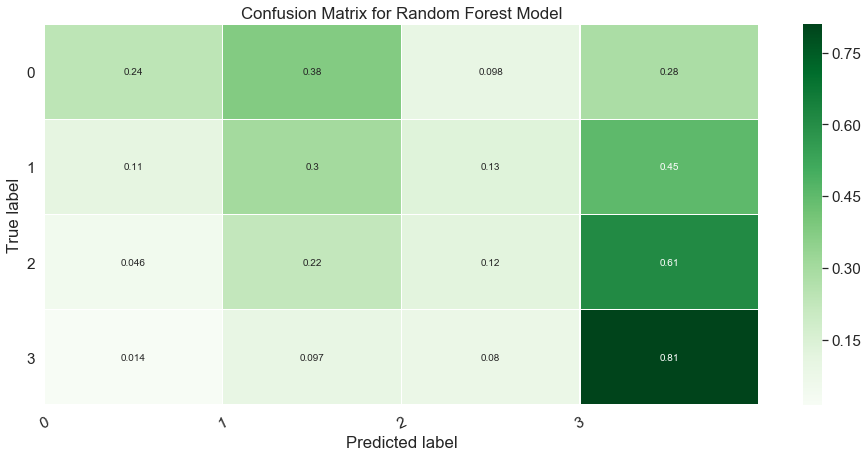

In [48]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### MLP

In [35]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = MinMaxScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test)  
    
    clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.412654,0.598868,0.463107
Wu,0.399853,0.638416,0.455316
Mencar,0.303856,0.705495,0.412924
Ustun,0.380229,0.660498,0.443859
Huang,0.400066,0.698542,0.441338
Rodruiges,0.391051,0.646853,0.453025
Demographic,0.284794,0.726218,0.428506
Measurements,0.395160,0.669172,0.438818
Comorbidities,0.269241,0.927288,0.401925
Symptoms,0.334784,0.768825,0.416132


##### Confusion matrix for model with highest balanced accuracy

In [49]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  
    
clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

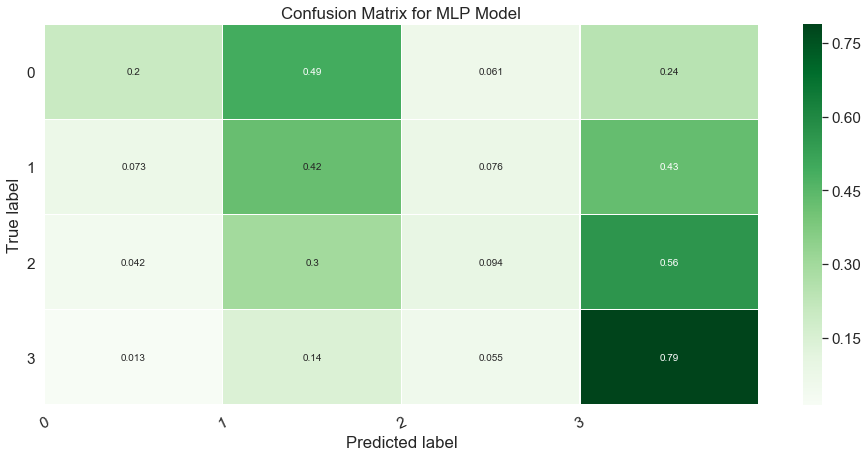

In [50]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLP Model')
plt.show()

### SVM

In [38]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = MinMaxScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.376818,0.575071,0.446609
Wu,0.356814,0.608094,0.428277
Mencar,0.323333,0.615968,0.403300
Ustun,0.353773,0.655258,0.425756
Huang,0.345957,0.610532,0.422090
Rodruiges,0.356817,0.618820,0.432172
Demographic,0.329725,0.637871,0.401467
Measurements,0.338225,0.543850,0.410174
Comorbidities,0.287878,0.579862,0.370302
Symptoms,0.288707,0.552216,0.388634


##### Confusion matrix for model with highest balanced accuracy

In [51]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  

clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 5000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


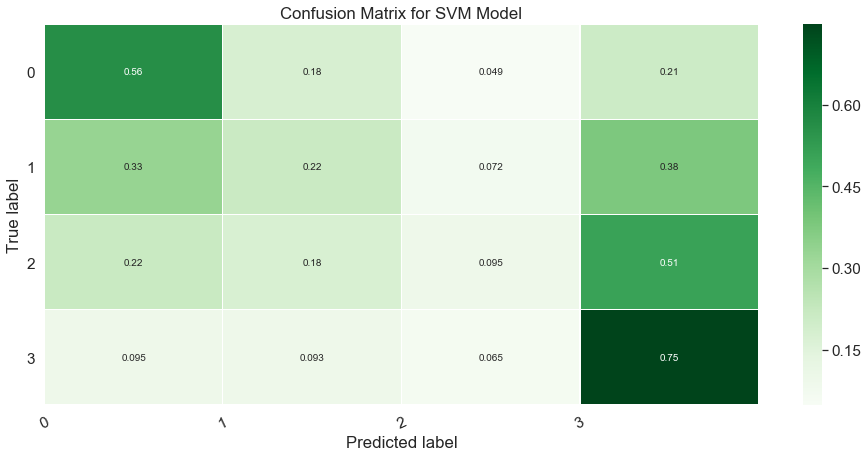

In [52]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

### Naive Bayes

In [45]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=GaussianNB()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes n

In [46]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.336308,0.555941,0.341659
Wu,0.363428,0.519763,0.430797
Mencar,0.322799,0.748628,0.417049
Ustun,0.382180,0.575815,0.423694
Huang,0.363300,0.744792,0.433089
Rodruiges,0.373820,0.513899,0.430797
Demographic,0.349518,0.629289,0.412924
Measurements,0.340774,0.477040,0.402841
Comorbidities,0.291162,0.662971,0.244042
Symptoms,0.284824,0.764886,0.410174


##### Confusion matrix for model with highest balanced accuracy

In [55]:
X=data[ustun]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=GaussianNB()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

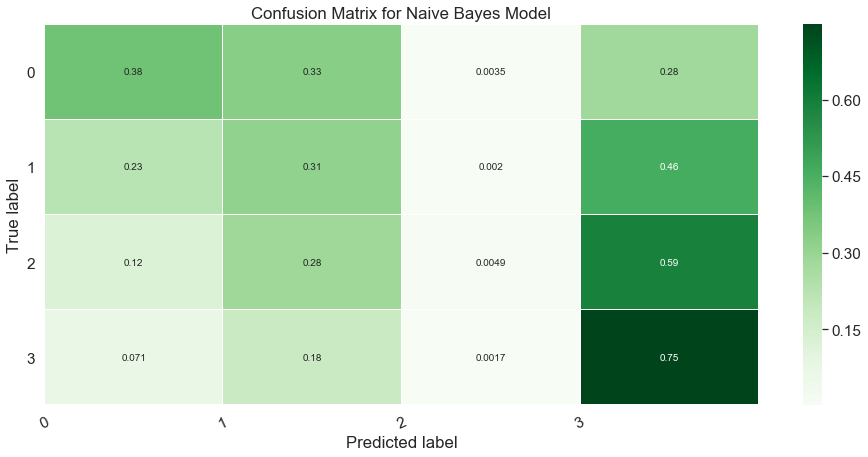

In [56]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

### Logistic Regression

In [43]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

In [44]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.389695,0.512849,0.442713
Wu,0.354452,0.507652,0.412236
Mencar,0.327170,0.470838,0.381072
Ustun,0.347905,0.533034,0.410174
Huang,0.340830,0.511773,0.403987
Rodruiges,0.358537,0.508651,0.413841
Demographic,0.317555,0.525450,0.380156
Measurements,0.332871,0.486106,0.381302
Comorbidities,0.309366,0.480083,0.296746
Symptoms,0.306705,0.497121,0.354262


##### Confusion matrix for model with highest balanced accuracy

In [58]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


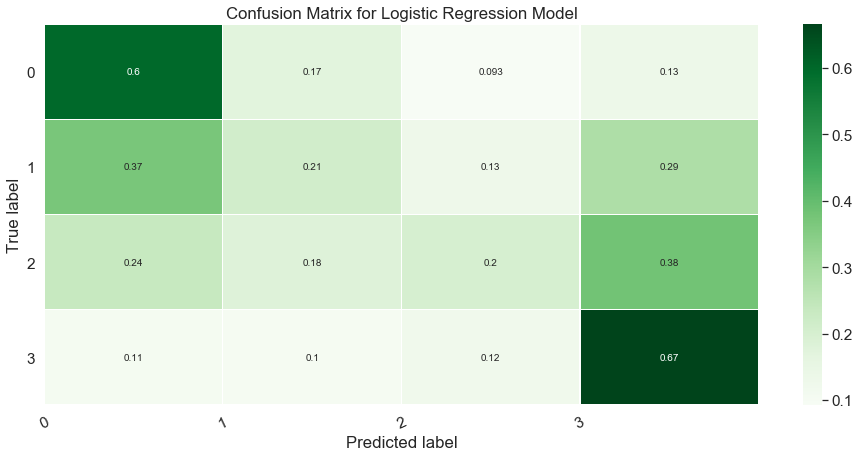

In [59]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [12]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

## XGB

In [25]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=XGBClassifier()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [26]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.398125,0.534855,0.453483
Wu,0.386458,0.555073,0.445005
Mencar,0.326444,0.573886,0.403529
Ustun,0.358732,0.578281,0.431027
Huang,0.348741,0.598869,0.428277
Rodruiges,0.374719,0.550494,0.436297
Demographic,0.338845,0.641805,0.414070
Measurements,0.345779,0.556581,0.419798
Comorbidities,0.267913,0.842862,0.395738
Symptoms,0.290639,0.657585,0.403529


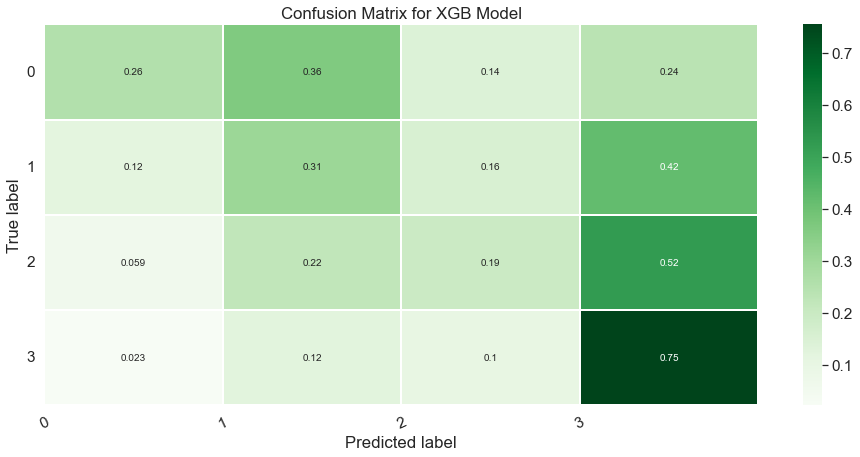

In [33]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=XGBClassifier()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGB Model')
plt.show()

## LightGBM

In [27]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=LGBMClassifier()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [28]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.411017,0.573697,0.464253
Wu,0.388345,0.590508,0.450275
Mencar,0.323561,0.602466,0.407424
Ustun,0.382462,0.619161,0.447754
Huang,0.365363,0.632885,0.438818
Rodruiges,0.396068,0.591484,0.451650
Demographic,0.351347,0.663771,0.419798
Measurements,0.359774,0.596094,0.431027
Comorbidities,0.281578,0.873413,0.400779
Symptoms,0.323124,0.698262,0.415445


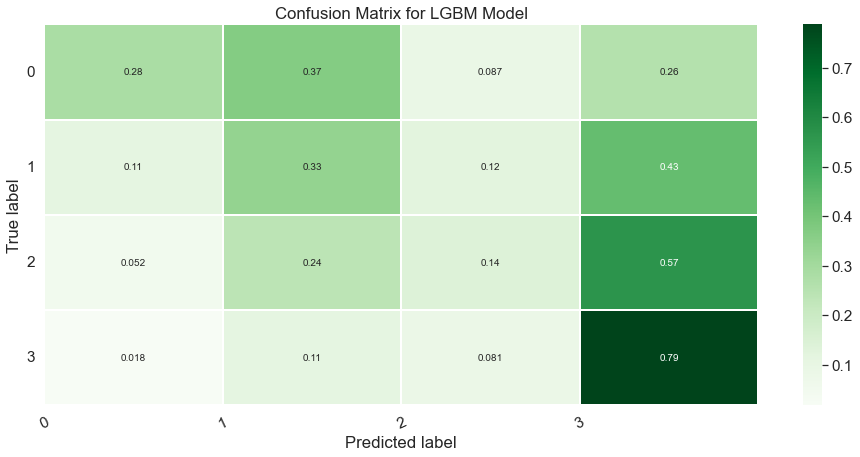

In [34]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=LGBMClassifier()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LGBM Model')
plt.show()

## CatBoost

In [29]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=CatBoostClassifier(silent=True)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [30]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.404042,0.549540,0.460357
Wu,0.378845,0.553578,0.440880
Mencar,0.322405,0.598252,0.408799
Ustun,0.371907,0.605584,0.441109
Huang,0.383980,0.635217,0.447067
Rodruiges,0.380819,0.562134,0.442942
Demographic,0.346923,0.677412,0.421861
Measurements,0.367092,0.572523,0.435839
Comorbidities,0.269994,0.784770,0.393446
Symptoms,0.292043,0.630302,0.402841


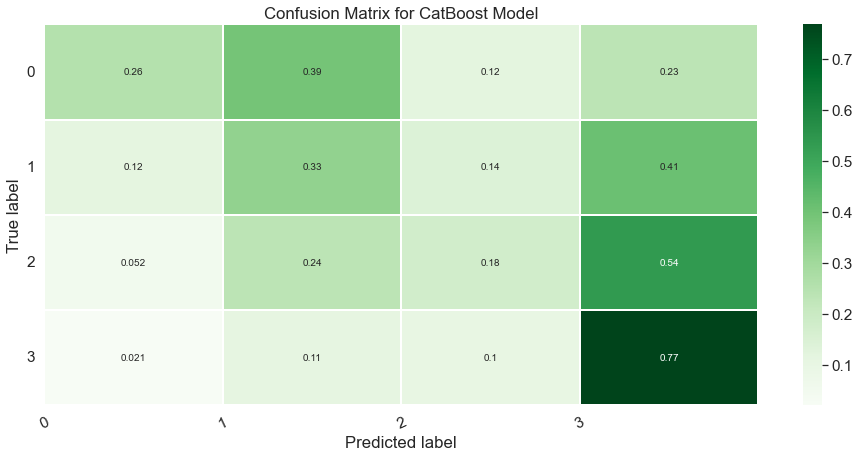

In [35]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=CatBoostClassifier(silent=True)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CatBoost Model')
plt.show()

## AdaBoost

In [31]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data[feature_list[key]]  # Features  
    y=data['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=AdaBoostClassifier()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\Users\amona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\amona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\amona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.418910,0.617669,0.463107
Wu,0.381951,0.651843,0.449358
Mencar,0.341943,0.757779,0.423236
Ustun,0.393605,0.661805,0.440880
Huang,0.364395,0.652691,0.435380
Rodruiges,0.392081,0.640304,0.446838
Demographic,0.327975,0.725490,0.424610
Measurements,0.368626,0.665922,0.433089
Comorbidities,0.356633,0.935616,0.400550
Symptoms,0.295060,0.772091,0.414299


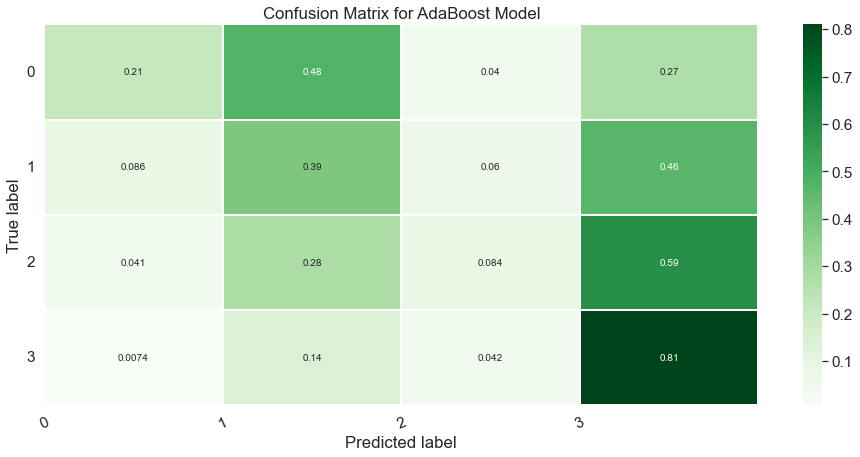

In [36]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=AdaBoostClassifier()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()